In [10]:
import pandas as pd
import os

df = pd.read_csv('../data/03_casos/df_53_cleaned.csv')
df


,ano,semana,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas,sub_reg_nt,...,defunciones_60mas_lag_3_semana,defunciones_60mas_lag_4_semana,defunciones_60mas_lag_5_semana,defunciones_60mas_lag_6_semana,mes,bimestre,trimestre,cuatrimestre,semestre,pandemia_covid
0,2023,43,1886,27,43,3,10,1,6,53,...,0.0,0.0,0.0,0.0,10,5,4,3,2,0
1,2023,44,1762,14,32,6,4,0,3,53,...,0.0,0.0,0.0,0.0,11,6,4,3,2,0
2,2023,45,1801,36,24,4,4,0,1,53,...,0.0,0.0,0.0,0.0,11,6,4,3,2,0
3,2023,46,2034,39,25,5,4,0,2,53,...,6.0,0.0,0.0,0.0,11,6,4,3,2,0
4,2023,47,2022,26,36,1,8,0,6,53,...,3.0,6.0,0.0,0.0,11,6,4,3,2,0
5,2023,48,1942,29,29,3,1,0,1,53,...,1.0,3.0,6.0,0.0,11,6,4,3,2,0
6,2023,49,1594,19,32,1,3,0,3,53,...,2.0,1.0,3.0,6.0,12,6,4,3,2,0
7,2023,50,2027,14,31,3,10,0,2,53,...,6.0,2.0,1.0,3.0,12,6,4,3,2,0
8,2023,51,1799,15,27,6,3,0,2,53,...,1.0,6.0,2.0,1.0,12,6,4,3,2,0
9,2023,52,1723,24,41,2,9,0,3,53,...,3.0,1.0,6.0,2.0,12,6,4,3,2,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 58 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ano                                10 non-null     int64  
 1   semana                             10 non-null     int64  
 2   ira_no_neumonia                    10 non-null     int64  
 3   neumonias_men5                     10 non-null     int64  
 4   neumonias_60mas                    10 non-null     int64  
 5   hospitalizados_men5                10 non-null     int64  
 6   hospitalizados_60mas               10 non-null     int64  
 7   defunciones_men5                   10 non-null     int64  
 8   defunciones_60mas                  10 non-null     int64  
 9   sub_reg_nt                         10 non-null     int64  
 10  ira_no_neumonia_lag_1_semana       10 non-null     float64
 11  ira_no_neumonia_lag_2_semana       10 non-null     float64
 1

In [12]:
target = "hospitalizados_men5"
y = df[target]


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

target = "hospitalizados_men5"  # <-- change if needed

# Select only numeric columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Correlation matrix
corr = numeric_df.corr()

# Correlation with target only
corr_target = corr[target].sort_values(ascending=False)
print(corr_target.head(15))  # Top positively correlated
print(corr_target.tail(15))  # Top negatively correlated


hospitalizados_men5                  1.000000
hospitalizados_60mas_lag_1_semana    0.694857
defunciones_men5_lag_1_semana        0.497067
defunciones_60mas_lag_1_semana       0.318653
defunciones_men5_lag_3_semana        0.305888
neumonias_60mas_lag_1_semana         0.297474
defunciones_men5_lag_2_semana        0.114708
bimestre                             0.076472
ira_no_neumonia                      0.065602
ira_no_neumonia_lag_1_semana         0.060073
neumonias_men5_lag_5_semana          0.022946
neumonias_men5                      -0.069325
defunciones_men5_lag_5_semana       -0.076472
defunciones_men5                    -0.076472
hospitalizados_men5_lag_1_semana    -0.080700
Name: hospitalizados_men5, dtype: float64
defunciones_men5_lag_4_semana      -0.458831
neumonias_60mas_lag_4_semana       -0.461100
hospitalizados_men5_lag_3_semana   -0.469756
ira_no_neumonia_lag_4_semana       -0.478680
neumonias_men5_lag_2_semana        -0.479794
defunciones_60mas_lag_6_semana     -0.48028

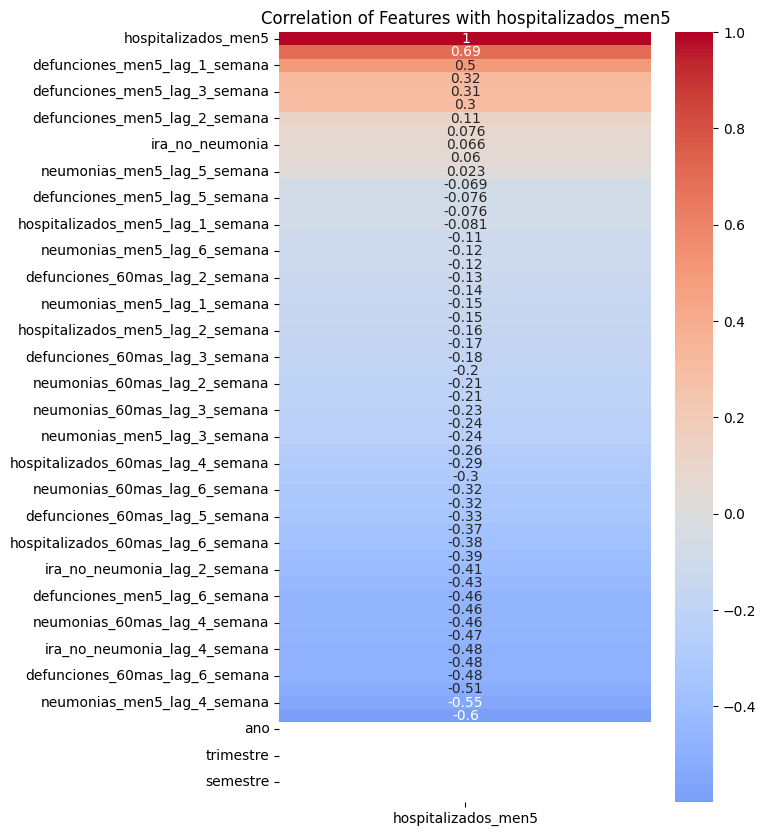

In [14]:
plt.figure(figsize=(6,10))
sns.heatmap(corr[[target]].sort_values(by=target, ascending=False),
            annot=True, cmap="coolwarm", center=0)
plt.title(f"Correlation of Features with {target}")
plt.show()
